# Introduction


# Imports

In [61]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Constants

In [68]:
INPUT_FOLDER = r"C:\repos\proj-air-hockey-git\ImageExport"
BACKGROUND_IMAGE = r"C:\repos\proj-air-hockey-git\background_image.png"

# Trajectory


In [28]:
# write a function that takes as input a pixel value and a target pixel value and a tolerance
# and returns a boolean value indicating whether the pixel value is within the tolerance of the target pixel value
def is_within_tolerance(pixel_value, target_pixel_value, tolerance):
    if pixel_value >= target_pixel_value - tolerance and pixel_value <= target_pixel_value + tolerance:
        return True
    else:
        return False

In [55]:
def make_transparent(image, target_color=(0,0,0), tolerance=0, transparency=255):
    img = image.convert('RGBA')
    data = img.getdata()
    newData = []
    for item in data:
        if is_within_tolerance(item[0], target_color[0], tolerance) and \
                is_within_tolerance(item[1], target_color[1], tolerance) and \
                    is_within_tolerance(item[2], target_color[2], tolerance):
            newData.append((item[0], item[1], item[2], 0))
        else:
            newData.append((item[0], item[1], item[2], int(transparency)))
    img.putdata(newData)
    return img

In [71]:
def overlay_images(input_folder, output_filename, step=10, save_images=False):
    # Get a list of all image files in the input folder
    image_files = glob.glob(os.path.join(input_folder, "*.png"))
    # Sort the list by modification time (oldest first)
    image_files.sort(key=os.path.getmtime)
    
    # Read the base (oldest) image
    base_image = Image.open(BACKGROUND_IMAGE).convert("RGBA")
    base_width, base_height = base_image.size

    # Iterate through the rest of the images
    for idx, img_path in enumerate(image_files[1:], 1):
        # skip step image(s)
        if idx % step == 0:
            img = Image.open(img_path).convert("RGBA")
            img = img.resize((base_width, base_height), resample=Image.Resampling.LANCZOS)

            # Calculate the transparency for the current image
            transparency = 255 * (1 - (idx / len(image_files)))
            # make background transparent
            img = make_transparent(img, target_color=(81,81,81), tolerance=2, transparency=transparency)

            # Overlay the current image on the base image
            base_image = Image.alpha_composite(base_image, img)

    # crop the image width
    base_image = base_image.crop((450, 0, 950, base_image.size[1]))
    # Save the resulting image
    if save_images:
        base_image.save(output_filename)

    # use matplotlib to display the image    
    plt.imshow(base_image)

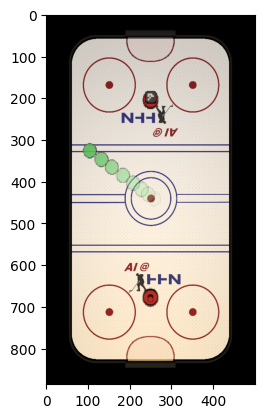

In [72]:
overlay_images(INPUT_FOLDER, "output.png", 20, False)